# For Laine

In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass


In [2]:
# Create a COM of object for Galaxy
COMD = CenterOfMass("MW_000.txt",1)

In [3]:
# Compute COM of Galaxy using halo particles
COMP = COMD.COM_P(0.1)
COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])

In [4]:
# Determine positions of halo particles relative to COM 
xH = COMD.x - COMP[0].value 
yH = COMD.y - COMP[1].value 
zH = COMD.z - COMP[2].value 

# total magnitude
rtot = np.sqrt(xH**2 + yH**2 + zH**2)

# Determine velocities of disk particles relatiev to COM motion
vxH = COMD.vx - COMV[0].value 
vyH = COMD.vy - COMV[1].value 
vzH = COMD.vz - COMV[2].value 

# total velocity 
vtot = np.sqrt(vxH**2 + vyH**2 + vzH**2)

# Arrays for r and v 
r = np.array([xH,yH,zH]).T # transposed 
v = np.array([vxH,vyH,vzH]).T

# masses
m = COMD.m

In [5]:
def SpecAngMomSphere(r,v,rad):
    # Returns the average specific angular momentum within spherical volumes
    # input : r = array of x, y, z
    # v = array of vx vy vz 
    # rad = float giving the relevant radius within which to compute the ang mom
   
    # ids for particle in the sphere
    idx = np.where(r < rad)

    # number of particles in the sphere
    nparticles = np.size(idx[0])
    
    # compute the specific angular momentum vector of all particles in the sphere
    L = np.sum(np.cross(r[idx[0],:],v[idx[0],:]), axis=0)
    
    # the average specific angular momentum in the sphere
    Lavg= np.sqrt(L[0]**2 + L[1]**2 + L[2]**2)/np.size(idx[0])
    return Lavg

In [6]:
def SpecAngMomShell(r,v,rad,dr):
    # Returns the average specific angular momentum in a shell
    # input : r = array of x, y, z
    # v = array of vx vy vz 
    # rad = float giving the relevant radius within which to compute the ang mom
    # dr = float giving the width of the shell   
    
    # ids for particle in the shell
    idx = np.where( (r<rad+dr) & (r>rad))

    # number of particles in the shell
    nparticles = np.size(idx[0])
    
    # compute the specific angular momentum vector of all particles in the shell
    L = np.sum(np.cross(r[idx[0],:],v[idx[0],:]), axis=0)
    
    # the average specific angular momentum in the shell
    Lavg= np.sqrt(L[0]**2 + L[1]**2 + L[2]**2)/np.size(idx[0])
    return Lavg

In [7]:
radii = np.arange(1, 400, 2)

In [8]:
# Initialize empty arrays
AngMomShell = np.zeros(np.size(radii))
AngMomSphere = np.zeros(np.size(radii))

In [9]:
dr = 1

In [10]:
i=0

In [13]:
# compute angular momentum in shell or sphere within each radius 
while i < np.size(radii):
    AngMomSphere[i] = SpecAngMomSphere(r,v,radii[i])
    AngMomShell[i] = SpecAngMomShell(r,v,radii[i], dr)

    i = i+ dr

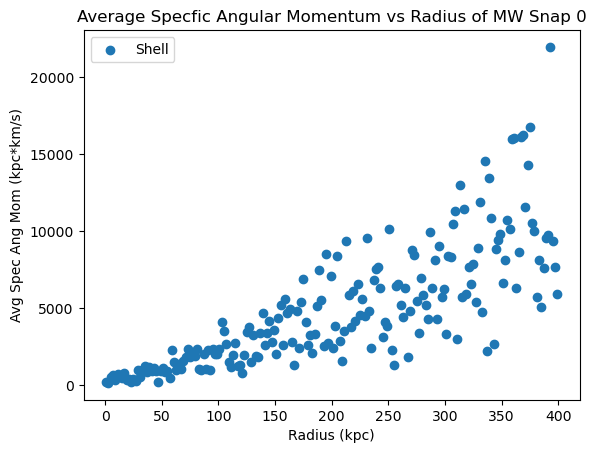

In [14]:
# Plotting In shells
fig, ax = plt.subplots()
ax.scatter(radii, AngMomShell, label= "Shell")


plt.title("Average Specfic Angular Momentum vs Radius of MW Snap 0")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel("Avg Spec Ang Mom (kpc*km/s)")
plt.legend()

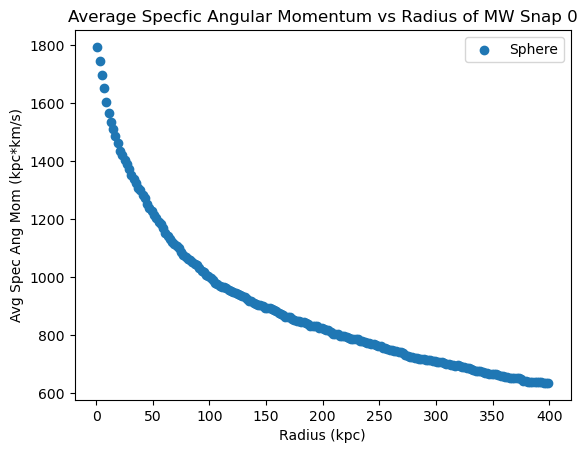

In [15]:
# Spherical Volumes
fig, ax = plt.subplots()
ax.scatter(radii, AngMomSphere, label="Sphere")


plt.title("Average Specfic Angular Momentum vs Radius of MW Snap 0")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel("Avg Spec Ang Mom (kpc*km/s)")
plt.legend()